In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import os


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.fit(
    x_train,
    y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.8815 - loss: 0.3761 - val_accuracy: 0.9860 - val_loss: 0.0417
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9815 - loss: 0.0601 - val_accuracy: 0.9900 - val_loss: 0.0307
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9867 - loss: 0.0425 - val_accuracy: 0.9917 - val_loss: 0.0267
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9896 - loss: 0.0317 - val_accuracy: 0.9909 - val_loss: 0.0273
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9919 - loss: 0.0272 - val_accuracy: 0.9908 - val_loss: 0.0285


In [6]:
model.save("digit_classifier.keras")
print("✅ Model saved successfully")


✅ Model saved successfully


In [16]:
uploaded = files.upload()


Saving nub6.jpg to nub6.jpg


In [17]:
from tensorflow.keras.models import load_model
def predict_digit(image_path):
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt
    import tensorflow as tf

    model = load_model("digit_classifier.keras")

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("❌ Image not found")
        return

    # Resize properly
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

    # Normalize
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)

    # Predict
    prediction = model.predict(img)
    digit = np.argmax(prediction)

    # Display (smooth)
    plt.imshow(img.reshape(28,28), cmap="gray", interpolation="bicubic")
    plt.title(f"Predicted Digit: {digit}")
    plt.axis("off")
    plt.show()

    return digit


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


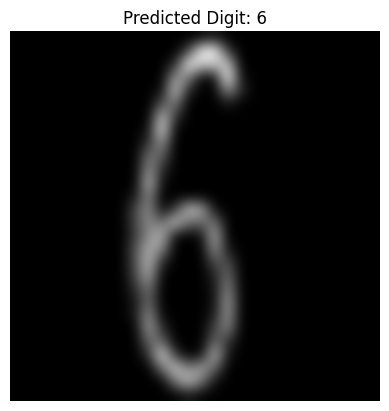

np.int64(6)

In [18]:
filename = list(uploaded.keys())[0]
predict_digit(filename)
